In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

###### Question 1
- Write a program to segment the boat and the people on it from the background. 
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [2]:
# Read the color image
image = cv.imread("boat.jpg")
 
# Make a copy
new_image = image.copy()
 
# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
 
# Display the grayscale image
cv.imshow('Gray image', gray)  
cv.waitKey(0) 
cv.destroyAllWindows() 

In [3]:
# otsu threshold
blur = cv.GaussianBlur(gray, (5, 5), 0)   # the third argument here is standard deviation
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

cv.imshow('Otsu Threshold', th)  
cv.waitKey(0) 
cv.destroyAllWindows() 

In [4]:
# To detect object contours, we want a black background and a white 
# foreground, so we invert the image (i.e. 255 - pixel value)
inverted_th = ~th
cv.imshow('Inverted binary image', inverted_th)
cv.waitKey(0) 
cv.destroyAllWindows()

In [5]:
foreground_idx = cv.findNonZero(inverted_th)
foreground_idx_2D = foreground_idx.reshape(-1, 2)

coord_max = np.max(foreground_idx_2D, axis = 0)
coord_min = np.min(foreground_idx_2D, axis = 0)

cv.rectangle(image, (coord_min[0], coord_min[1]), (coord_max[0], coord_max[1]), (255, 0, 0), 2, cv.LINE_AA)
         
cv.imshow('bounding box', image)
cv.waitKey(0)
cv.destroyAllWindows()

###### Question 2
- Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [6]:
# erosion
img = cv.imread('leaf.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 50, 255, cv.THRESH_BINARY)

def trackbar(x):
    n = 2*x + 1
    kernel = np.ones((n, n), np.uint8)  
    erosion = cv.erode(img_binary, kernel, iterations = 1)
    cv.imshow('window', np.vstack([img_binary, erosion]))

cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 2, 5, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# dilation
img = cv.imread('leaf.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 50, 255, cv.THRESH_BINARY)

def trackbar(x):
    n = 2*x + 1
    kernel = np.ones((n, n), np.uint8)  
    dilation = cv.dilate(img_binary, kernel, iterations = 1)
    cv.imshow('window', np.vstack([img_binary, dilation]))

cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 2, 5, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

###### Question 3
- Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [20]:
resize_dim1 = (318, 159) #porcelain 1
resize_dim2 = (225, 225) #porcelain 2
resize_dim3 = (194, 259)

In [28]:
# Create a custom function
def segment_porcelain(img):
    
    # Convert image to HSV
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    # Set the blue color range in HSV color space
    blue_low = (70, 120, 0)
    blue_up = (120, 255, 120)

    # Create blue mask
    mask_blue = cv.inRange(hsv, blue_low, blue_up)

    # Set the white color range in HSV color space
    white_low = (0, 0, 150)
    white_up = (150, 45, 255)

    # Create white mask
    mask_white = cv.inRange(hsv, white_low, white_up)

    # AND operation to get the segmented blue region
    mask = cv.add(mask_blue, mask_white)
    res = cv.bitwise_and(img, img, mask = mask)

    # clean up the segmentation using blur filter
    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur

filename = "porcelain"

porcelain_list = []
for i in range(1, 6):
    if(i == 1):
        img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim1)
    elif(i == 2):
        img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim2)
    else:
        img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim3)
        
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)
    
results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

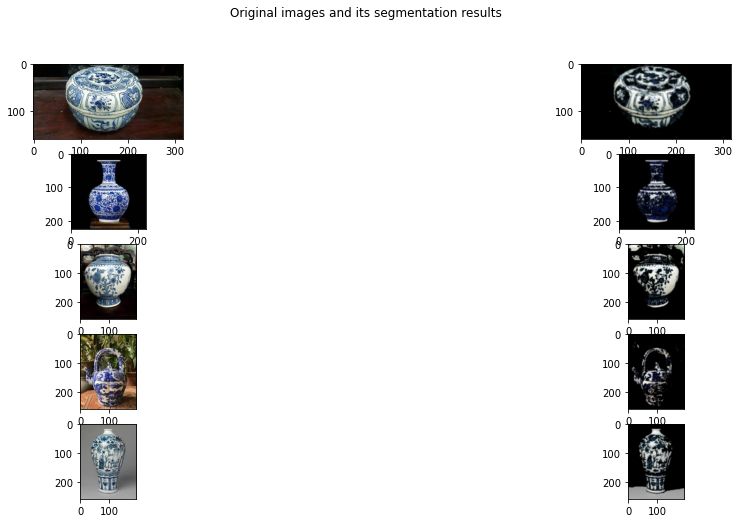

In [29]:
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])

f.suptitle('Original images and its segmentation results')
plt.show()